         Frequency
Word              
'',         100727
'im',        25553
'dont',      18057
'?',         16652
'like',      16063
'oh',        15220
'know',      15164
'yeah',      14767
'love',      14196
'got',       11350


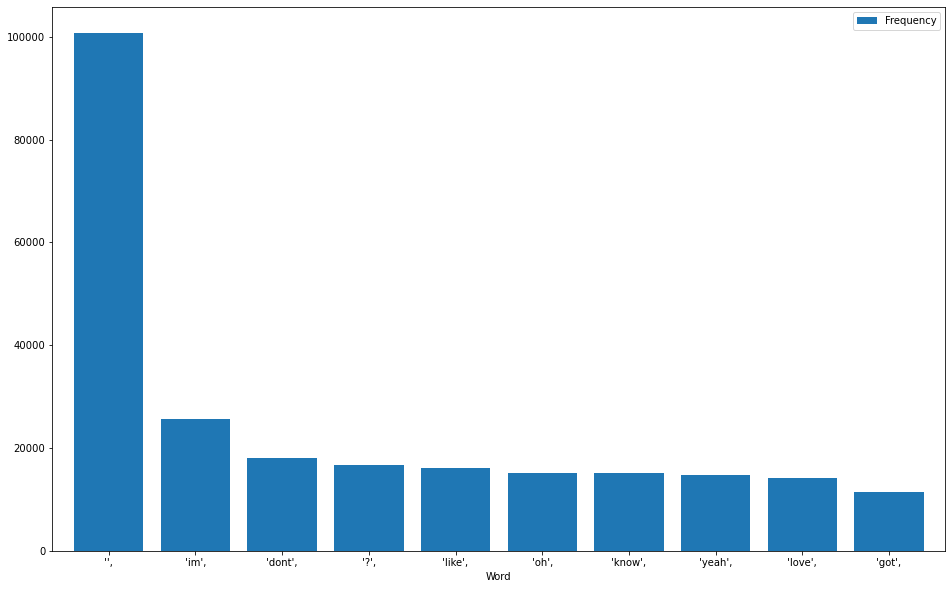

In [103]:
from collections import Counter
import pandas as pd
import numpy as np
import nltk
#nltk.download('stopwords')

# Bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook, push_notebook, show

top_N = 10

df = pd.read_csv('../Data/nlp_df.csv',
                 usecols=['category','filtered'])

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.filtered
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

In [123]:
rslt = frequency_df
frequency_df.head()

,Frequency
Word,
"'',",100727
"'im',",25553
"'dont',",18057
"'?',",16652
"'like',",16063


In [124]:
# prepare some data
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import pandas_bokeh

# output to static HTML file
# output_file("log_lines.html")
output_notebook()


frequency_df.plot_bokeh(
    kind='bar',
    xlabel='Word',
    ylabel='Frequency',
    title='Words by Frequency'
)


Loading BokehJS ...

Figure(id='4775', ...)